## 🧠 Problem Statement Explanation

### 1) Problem Statement
> Using machine learning, we have to predict whether a person will be approved for a loan or not.

---

### 2) Why is this important?

Let’s imagine a real-world scenario:

---

### 🏠 Meet Raj — A Dream, A Loan, and a Long Wait

Raj is a middle-class individual with a steady income. He has been saving for years with one goal in mind — to build a home for his family.

One day, he finally finds the perfect plot. But like many others, Raj doesn’t have all the money upfront. He needs a **home loan**. Confident in his financials, he walks into a bank and applies.

#### ❌ What happens next?

- **Manual Process**: Raj’s documents go through a traditional loan officer who manually checks his income, job status, bank statements, etc.
- **Delays**: Due to backlog or holidays, his application sits for **weeks**.
- **Bias Risk**: The officer might have unconscious biases or simply miss something.
- **Uncertainty**: Raj hears nothing for days, unsure if he should continue planning the construction or hold off.

In the meantime, **the land seller finds another buyer**. Raj misses the opportunity.

---

### ✅ What if there was a smarter way?

Now imagine a bank that uses a **machine learning pipeline**:

- Raj uploads his documents online.
- The ML model analyzes his data in seconds — checking income stability, loan amount, credit score, etc.
- Based on historical approval patterns, it predicts **"Loan likely to be approved"**.
- The decision is fast, consistent, and data-driven.

👉 Raj gets **instant approval** (or at least a fast-track pre-approval), allowing him to move forward with confidence.

---

### 💡 The Bigger Picture

- This system helps **thousands of applicants like Raj**.
- It saves **time and costs** for the bank.
- It brings **transparency** to the process.
- And it promotes **financial inclusion**, especially for people with non-standard jobs (like freelancers or gig workers) who are often rejected by rigid manual checks.

---

### ✅ Summary

> A loan is not just a number — it can decide whether someone builds a home, starts a business, or supports their family.  
> By predicting loan approval using machine learning, we’re creating faster, fairer, and smarter financial systems that work for everyone — people like Raj, banks, and the entire economy.


In [112]:

#Attributes present inside out data
import pandas as pd
data = pd.read_csv("data/train.csv")

In [113]:
print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### 📊 Dataset Column Descriptions

| Column Name           | Description |
|-----------------------|-------------|
| **Loan_ID**           | Unique identifier for each loan application. |
| **Gender**            | Gender of the applicant (e.g., Male, Female). |
| **Married**           | Marital status of the applicant (Yes/No). |
| **Dependents**        | Number of dependents the applicant has (e.g., 0, 1, 2, 3+). |
| **Education**         | Educational qualification of the applicant (Graduate/Not Graduate). |
| **Self_Employed**     | Whether the applicant is self-employed (Yes/No). |
| **ApplicantIncome**   | Monthly income of the applicant. |
| **CoapplicantIncome** | Monthly income of the co-applicant (if any). |
| **LoanAmount**        | Loan amount requested (in thousands). |
| **Loan_Amount_Term**  | Duration of the loan repayment term (in months). |
| **Credit_History**    | Whether the applicant has a credit history (1 = Yes, 0 = No). |
| **Property_Area**     | Type of area where the property is located (Urban/Semiurban/Rural). |
| **Loan_Status**       | Target variable — whether the loan was approved (Y = Yes, N = No). |


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from IPython.display import Image
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder

from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier



import warnings
warnings.filterwarnings('ignore')

#chi-square test of independence

In [115]:
#Reading data and understanding the data
data = pd.read_csv("data/train.csv")


In [116]:
#checking  the datasets shape to get a proper understanding
print("shape of customer",data.shape)

shape of customer (614, 13)


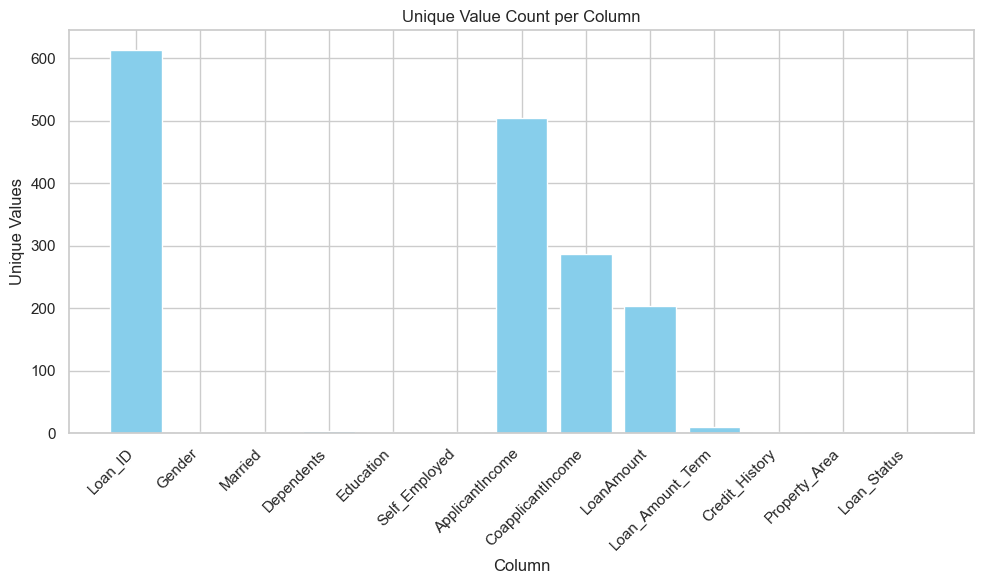

In [117]:
# Step 1: Create a summary DataFrame of column-wise unique counts
unique_counts = pd.DataFrame({
    'Column': data.columns,
    'Unique Values': [data[col].nunique() for col in data.columns]
})

# Step 2: Plot using Matplotlib
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.bar(unique_counts['Column'], unique_counts['Unique Values'], color='skyblue')
plt.xlabel('Column')
plt.ylabel('Unique Values')
plt.title('Unique Value Count per Column')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [118]:
#Column Loan_id is having so many rows but we have to verify whther they are unique or not
#Check for duplicate Loan_ID's
print("\nChecking for duplicate Loan_ID's:")
print(data['Loan_ID'].duplicated().any())

#Print the duplicate Loan_ID's
print("\nDuplicate Loan_ID's:")
print(data[data['Loan_ID'].duplicated()]['Loan_ID'])


Checking for duplicate Loan_ID's:
False

Duplicate Loan_ID's:
Series([], Name: Loan_ID, dtype: object)



## 🔍 Exploratory Questions for Pivot Table Analysis

Below are some meaningful questions that can be explored using pivot table aggregations to better understand loan approval patterns in the dataset:

---

### 1. Loan Approval by Gender and Marital Status
**Question:** What are the counts of loan approval (`Y`) and rejection (`N`) for different combinations of `Gender` and `Married`?  
**Purpose:** To analyze if being married or of a particular gender improves approval chances.

---

### 2. Loan Approval by Number of Dependents
**Question:** How does the number of `Dependents` affect loan approval rates?  
**Purpose:** Understand if having more dependents reduces the chances of approval.

---

### 3. Loan Approval by Education and Employment Status
**Question:** Are graduates or self-employed applicants more likely to get loans approved?  
**Purpose:** To assess the influence of `Education` and `Self_Employed` on loan approval.

---

### 4. Loan Status by Property Area
**Question:** Which `Property_Area` (Urban, Rural, Semiurban) sees the most loan approvals?  
**Purpose:** To identify geographical biases in loan approval.

---

### 5. Influence of Credit History
**Question:** How does `Credit_History` (1: good, 0: bad) impact loan approval?  
**Purpose:** To confirm the effect of credit history on loan decision outcomes.

---

### 6. Average Loan Amount by Loan Status
**Question:** What’s the average `LoanAmount` for approved vs rejected loans?  
**Purpose:** Determine if larger loan requests are less likely to be approved.

---

### 7. Income Analysis by Loan Status
**Question:** How do `ApplicantIncome` and `CoapplicantIncome` differ between approved and rejected loans?  
**Purpose:** To assess income patterns and their influence on approval.

---

### 8. Loan Amount Term and Approval Correlation
**Question:** Does the length of `Loan_Amount_Term` impact loan approval likelihood?  
**Purpose:** To check if shorter or longer loan durations are preferred by lenders.


---

### 9. Loan Approval by Education and Gender
**Question:** How does the combination of `Education` and `Gender` influence loan approval?  
**Purpose:** To uncover whether education offsets any gender bias in approvals.

---

### 10. Combined Income Influence
**Question:** How does the sum of `ApplicantIncome` and `CoapplicantIncome` vary between approved and rejected loans?  
**Purpose:** Sometimes combined income gives a clearer financial picture for approval decisions.

---

### 11. Loan Amount to Income Ratio
**Question:** What is the average `LoanAmount` to `TotalIncome` ratio for approved vs rejected loans?  
**Purpose:** To see if applicants are being approved or denied based on loan affordability.

---

### 12. Approval Rates Over Different Loan Amount Ranges
**Question:** What are the loan approval rates across different `LoanAmount` bins (e.g., low, medium, high)?  
**Purpose:** Visualizing the approval rate by loan amount tiers helps in understanding risk tolerance.

---
```




In [119]:
# Create a TotalIncome column for combined income analysis
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

# Create Loan to Income Ratio column
data["LoanToIncomeRatio"] = data["LoanAmount"] / data["TotalIncome"]

# Binning LoanAmount
data["LoanAmount_Bin"] = pd.cut(data["LoanAmount"], bins=[0, 100, 200, 700], labels=["Low", "Medium", "High"])

# 1. Loan Approval by Gender and Marital Status
pivot1 = pd.pivot_table(data, index=["Gender", "Married"], columns="Loan_Status", aggfunc='size', fill_value=0)

# 2. Loan Approval by Number of Dependents
pivot2 = pd.pivot_table(data, index="Dependents", columns="Loan_Status", aggfunc='size', fill_value=0)

# 3. Loan Approval by Education and Employment Status
pivot3 = pd.pivot_table(data, index=["Education", "Self_Employed"], columns="Loan_Status", aggfunc='size', fill_value=0)

# 4. Loan Status by Property Area
pivot4 = pd.pivot_table(data, index="Property_Area", columns="Loan_Status", aggfunc='size', fill_value=0)

# 5. Influence of Credit History
pivot5 = pd.pivot_table(data, index="Credit_History", columns="Loan_Status", aggfunc='size', fill_value=0)

# 6. Average Loan Amount by Loan Status
pivot6 = data.groupby("Loan_Status")["LoanAmount"].mean()

# 7. Income Analysis by Loan Status
pivot7 = data.groupby("Loan_Status")[["ApplicantIncome", "CoapplicantIncome"]].mean()

# 8. Loan Amount Term and Approval Correlation
pivot8 = pd.pivot_table(data, index="Loan_Amount_Term", columns="Loan_Status", aggfunc='size', fill_value=0)

# 9. Loan Approval by Education and Gender
pivot9 = pd.pivot_table(data, index=["Education", "Gender"], columns="Loan_Status", aggfunc='size', fill_value=0)

# 10. Combined Income Influence
pivot10 = data.groupby("Loan_Status")["TotalIncome"].mean()

# 11. Loan Amount to Income Ratio
pivot11 = data.groupby("Loan_Status")["LoanToIncomeRatio"].mean()

# 12. Approval Rates Over Different Loan Amount Ranges
pivot12 = pd.pivot_table(data, index="LoanAmount_Bin", columns="Loan_Status", aggfunc='size', fill_value=0)

# Display results
pivot_tables = {
    "1. Gender and Marital Status": pivot1,
    "2. Dependents": pivot2,
    "3. Education and Employment": pivot3,
    "4. Property Area": pivot4,
    "5. Credit History": pivot5,
    "6. Avg Loan Amount": pivot6,
    "7. Income by Status": pivot7,
    "8. Loan Term": pivot8,
    "9. Education and Gender": pivot9,
    "10. Total Income by Status": pivot10,
    "11. Loan to Income Ratio": pivot11,
    "12. Loan Amount Bins": pivot12
}


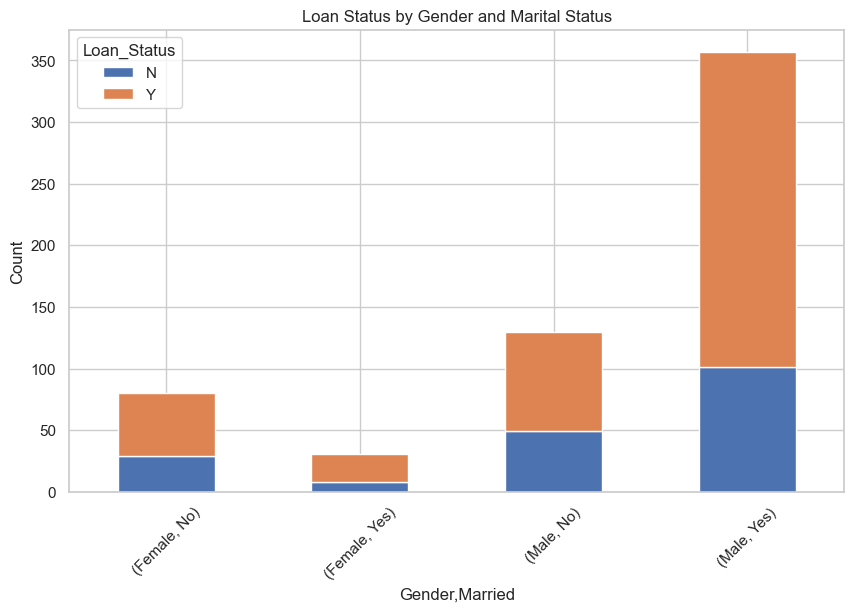

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# 1. Gender and Marital Status
pivot1.plot(kind="bar", stacked=True)
plt.title("Loan Status by Gender and Marital Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()




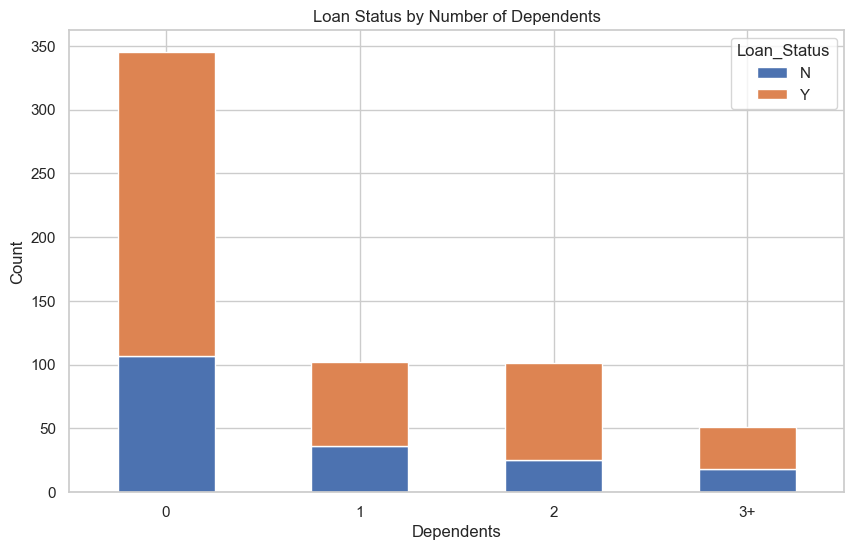

In [121]:
# 2. Dependents
pivot2.plot(kind="bar", stacked=True)
plt.title("Loan Status by Number of Dependents")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



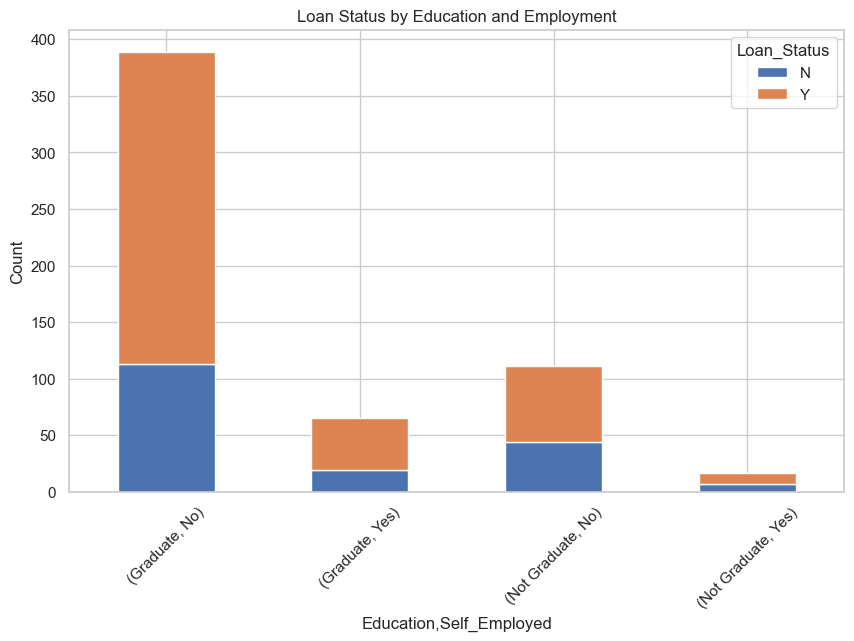

In [122]:
# 3. Education and Employment
pivot3.plot(kind="bar", stacked=True)
plt.title("Loan Status by Education and Employment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



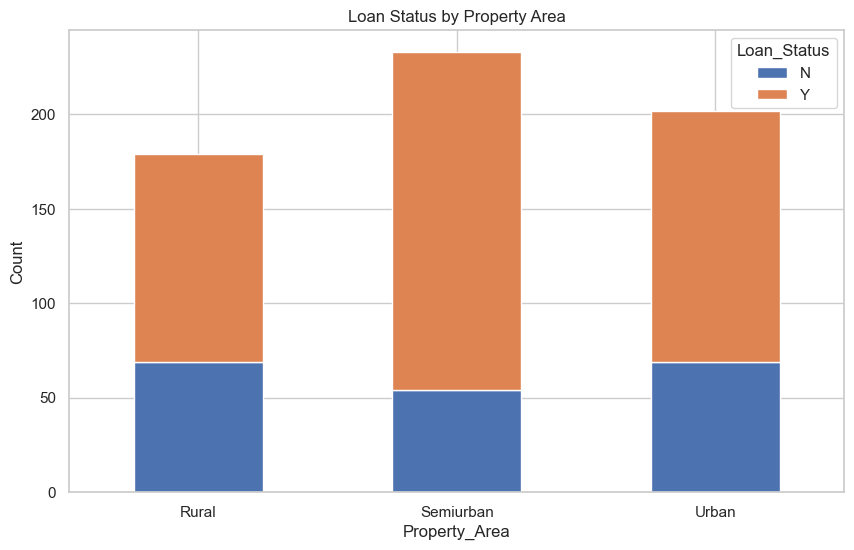

In [123]:
# 4. Property Area
pivot4.plot(kind="bar", stacked=True)
plt.title("Loan Status by Property Area")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()



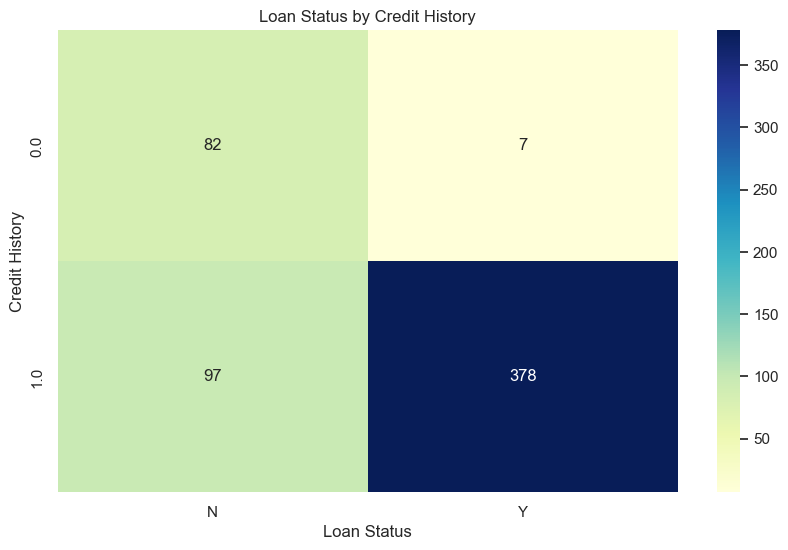

In [124]:
# 5. Credit History (Heatmap for visual clarity)
sns.heatmap(pivot5, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Loan Status by Credit History")
plt.ylabel("Credit History")
plt.xlabel("Loan Status")
plt.show()



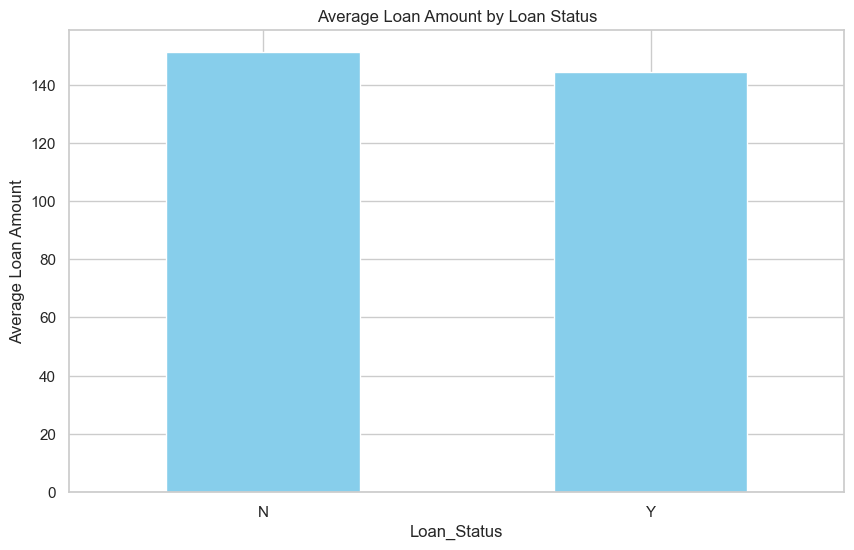

In [125]:
# 6. Average Loan Amount by Loan Status
pivot6.plot(kind="bar", color="skyblue")
plt.title("Average Loan Amount by Loan Status")
plt.ylabel("Average Loan Amount")
plt.xticks(rotation=0)
plt.show()



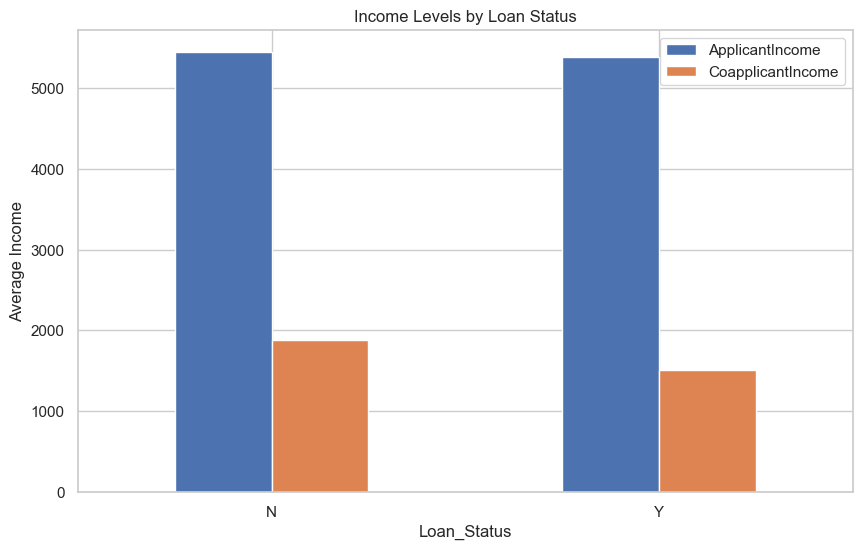

In [126]:
# 7. Income Analysis by Loan Status
pivot7.plot(kind="bar")
plt.title("Income Levels by Loan Status")
plt.ylabel("Average Income")
plt.xticks(rotation=0)
plt.show()



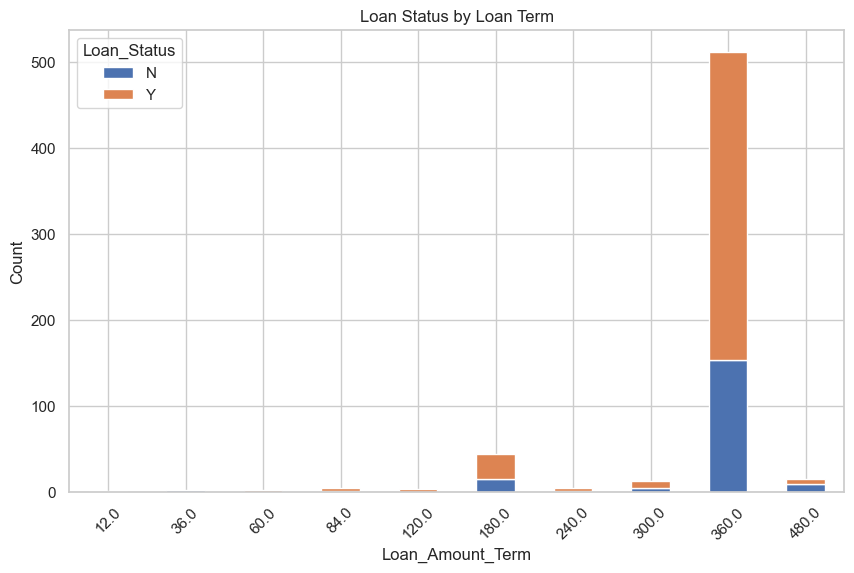

In [127]:
# 8. Loan Amount Term
pivot8.plot(kind="bar", stacked=True)
plt.title("Loan Status by Loan Term")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



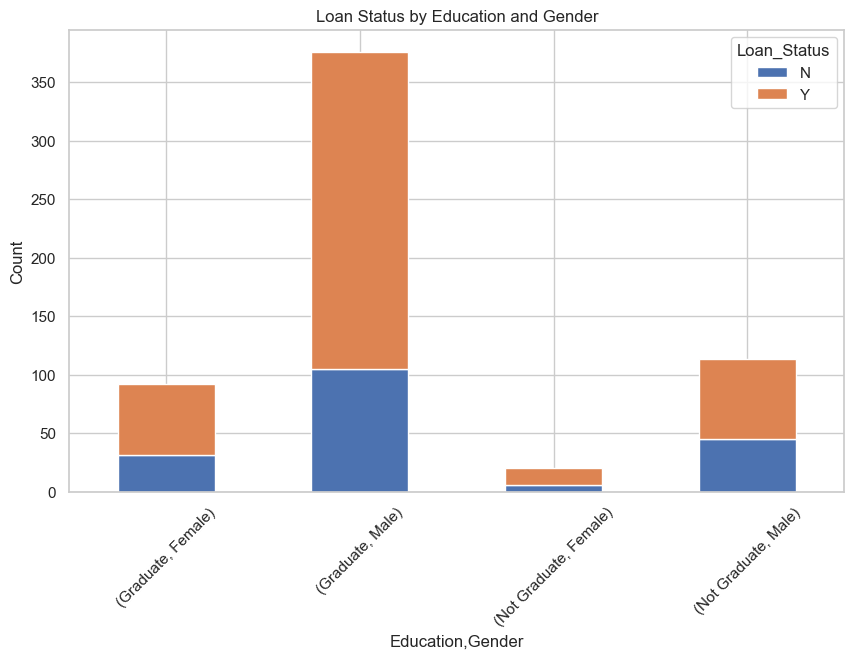

In [128]:
# 9. Education and Gender
pivot9.plot(kind="bar", stacked=True)
plt.title("Loan Status by Education and Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



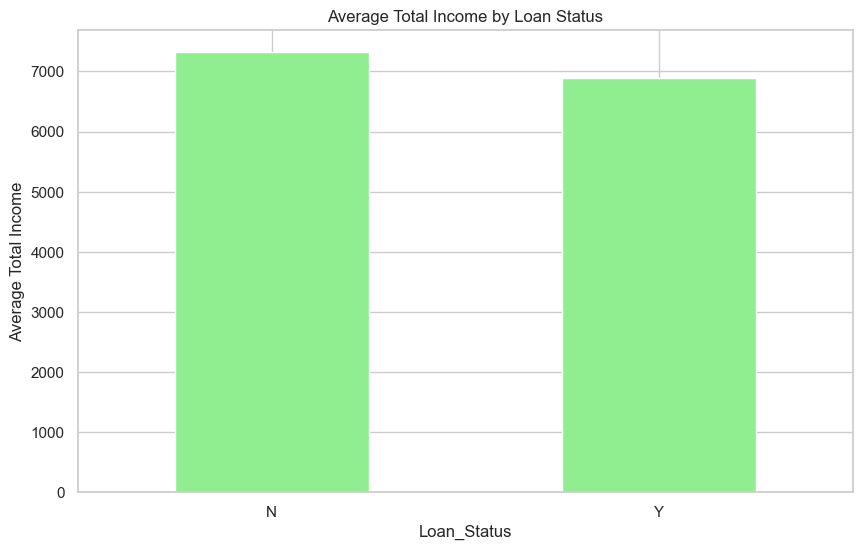

In [129]:
# 10. Total Income by Loan Status
pivot10.plot(kind="bar", color="lightgreen")
plt.title("Average Total Income by Loan Status")
plt.ylabel("Average Total Income")
plt.xticks(rotation=0)
plt.show()



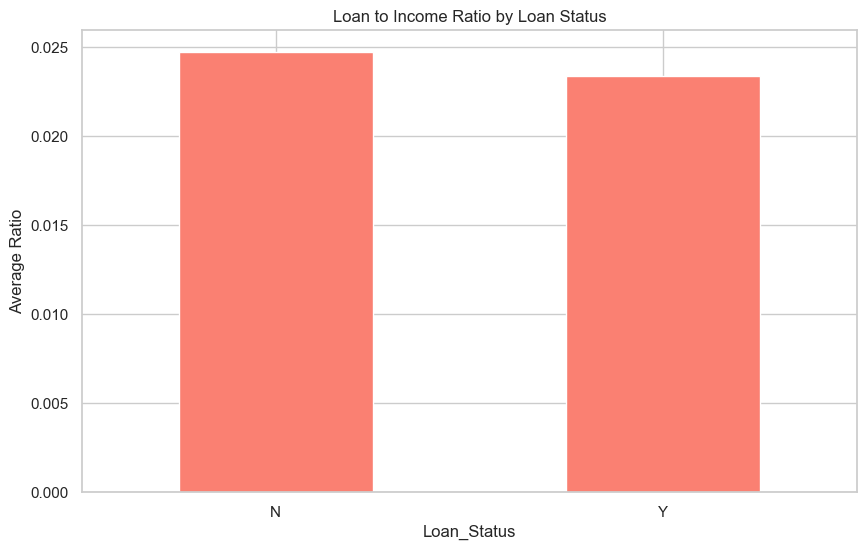

In [130]:
# 11. Loan to Income Ratio
pivot11.plot(kind="bar", color="salmon")
plt.title("Loan to Income Ratio by Loan Status")
plt.ylabel("Average Ratio")
plt.xticks(rotation=0)
plt.show()



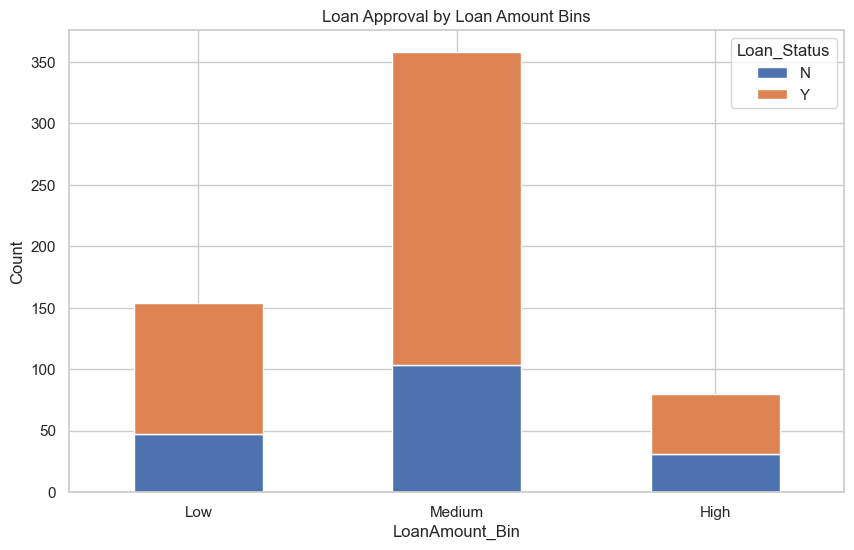

In [131]:
# 12. Loan Amount Bins
pivot12.plot(kind="bar", stacked=True)
plt.title("Loan Approval by Loan Amount Bins")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

## 📊 Insights from Loan Approval Data

The visualizations of the pivot tables uncover several important patterns about the loan approval process. Together, they help us understand how different applicant characteristics influence outcomes.

---

### 1. Gender Bias in Approval Patterns
Loan approvals are relatively high for both genders, but **male applicants show a stronger approval trend**. This could be due to socioeconomic factors like higher incomes, stable jobs, or better credit histories. The model — or possibly the original bank approval process — may reflect a subtle gender bias that warrants deeper fairness evaluation.

---

### 2. Dependents and Financial Burden
There’s a **negative correlation between the number of dependents and loan approvals**. More dependents may signal higher financial responsibilities, reducing the applicant’s perceived ability to repay. Lenders seem more cautious when applicants support larger families.

---

### 3. Education and Employment Combination
**Graduates who are not self-employed** dominate in both approvals and rejections, possibly due to their high representation. But **self-employed applicants**, regardless of education, face higher rejection rates — likely due to income variability or insufficient documentation.

---

### 4. Location Matters
**Semiurban areas lead in approvals**, followed by urban and rural. This might be because semiurban applicants strike a balance between having access to financial services and lower cost of living, improving their repayment capacity.

---

### 5. Credit History is Key
As expected, **credit history has the strongest influence**. Applicants with a good credit track record (`Credit_History = 1`) are overwhelmingly favored. This reflects standard lending logic where past behavior is used to predict future reliability.

---

### 6. Socioeconomic Status and Approval
**Higher-status groups** (possibly inferred from income and employment type) face fewer rejections. This aligns with risk-based lending, where more financially stable applicants pose less default risk.

---

### 7. Loan-to-Income Ratio Warning Signal
Applicants with a **higher loan-to-income ratio** see fewer approvals. This shows that banks penalize high-risk profiles where the requested loan appears unaffordable given the income.

---

### 8. The Income Paradox — Outliers or Anomalies?
Interestingly, the **average total income of rejected applicants is higher** than that of approved ones — an unexpected finding. This suggests:

- **Outliers**: A few very high-income individuals might skew the average, yet were denied due to other red flags (e.g., no credit history, unstable jobs).
- **Non-financial criteria**: Even high-income applicants can be rejected if they lack documentation, have poor credit history, or other disqualifying factors.

This insight signals the need for **descriptive statistics and outlier analysis** — e.g., visualizing income distributions and examining those with high income but rejected status — to fully explain the anomaly.


### now lets starts building our notebook which will cover data preprocessing,descriptive stastics about data,feature engineering,model training,model evaluation

### Data preprocessing


In [132]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,LoanToIncomeRatio,LoanAmount_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,NaN,NaN
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.021015,Medium
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.022000,Low
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.024287,Medium
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.023500,Medium


In [133]:
data.shape

(614, 16)

In [134]:
#understanding datatypes of each column
data.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area          object
Loan_Status            object
TotalIncome           float64
LoanToIncomeRatio     float64
LoanAmount_Bin       category
dtype: object

In [135]:
#checking for unique values in each column such that we could whether there are any incorrect dtypes
for i in data.columns:
  print("no of unique values and dtype:","|",i,"|",data[i].nunique(),"|",data[i].dtype)

no of unique values and dtype: | Loan_ID | 614 | object
no of unique values and dtype: | Gender | 2 | object
no of unique values and dtype: | Married | 2 | object
no of unique values and dtype: | Dependents | 4 | object
no of unique values and dtype: | Education | 2 | object
no of unique values and dtype: | Self_Employed | 2 | object
no of unique values and dtype: | ApplicantIncome | 505 | int64
no of unique values and dtype: | CoapplicantIncome | 287 | float64
no of unique values and dtype: | LoanAmount | 203 | float64
no of unique values and dtype: | Loan_Amount_Term | 10 | float64
no of unique values and dtype: | Credit_History | 2 | float64
no of unique values and dtype: | Property_Area | 3 | object
no of unique values and dtype: | Loan_Status | 2 | object
no of unique values and dtype: | TotalIncome | 554 | float64
no of unique values and dtype: | LoanToIncomeRatio | 587 | float64
no of unique values and dtype: | LoanAmount_Bin | 3 | category


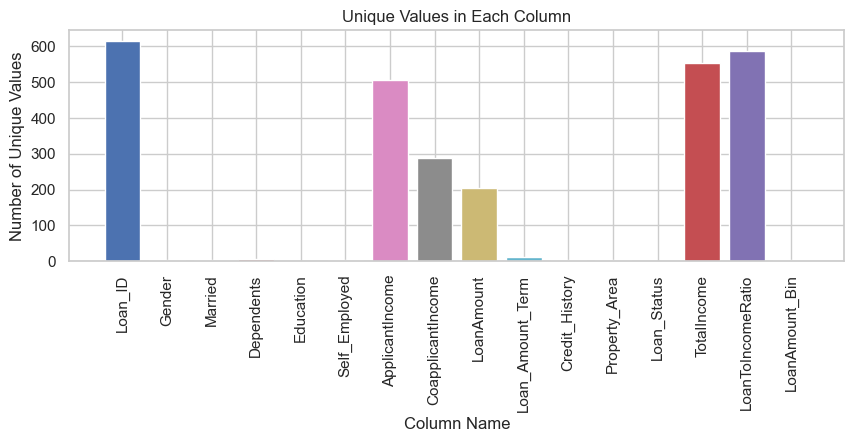

In [136]:
fig, ax = plt.subplots(figsize=(10, 3))
# Iterating over the columns
for col in data.columns:
    # Calculate the number of unique values in the column
    num_unique = len(data[col].unique())
    # Plot a bar for each column
    ax.bar(col, num_unique)
# Customize the chart
ax.set_xlabel('Column Name')
ax.set_ylabel('Number of Unique Values')
ax.set_title('Unique Values in Each Column')
plt.xticks(rotation=90)

# Show the chart
plt.show()


In [137]:
# Basic Info of the Data Frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             601 non-null    object  
 2   Married            611 non-null    object  
 3   Dependents         599 non-null    object  
 4   Education          614 non-null    object  
 5   Self_Employed      582 non-null    object  
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         592 non-null    float64 
 9   Loan_Amount_Term   600 non-null    float64 
 10  Credit_History     564 non-null    float64 
 11  Property_Area      614 non-null    object  
 12  Loan_Status        614 non-null    object  
 13  TotalIncome        614 non-null    float64 
 14  LoanToIncomeRatio  592 non-null    float64 
 15  LoanAmount_Bin     592 non-null    category
dtypes: categ

if we observe here there are null values present across different columns so we have to find the reason why it is a null value, after that based upon the value importance we can decide the imputation technique

In [138]:
missing_cols = data.isnull().sum()
missing_cols = missing_cols[missing_cols > 0]
print(missing_cols)


Gender               13
Married               3
Dependents           15
Self_Employed        32
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
LoanToIncomeRatio    22
LoanAmount_Bin       22
dtype: int64


#so now we have to find out why these columns are having null values.Lets impute categorical columns with mode value of that column  first.
Why?
The mode (most frequent value) is used for categorical features because:

It preserves the distribution of data.

Categorical features don’t have meaningful means/medians.

It’s simple and avoids introducing bias (unlike randomly filling or using "Unknown").

A better way could be :
If there's domain knowledge (e.g., gender missing only for certain income brackets), group-wise imputation (mode per group) or predictive imputation can be better.

In [139]:
# Categorical Mode Imputation
cat_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

Lets impute for numerical columns now


In [140]:
data['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [141]:
# Loan_Amount_Term: Most common value is usually 360
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [142]:
data["LoanAmount"].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Mean vs. Median: The mean (average) loan amount is 146.41, while the median (50th percentile) is 128.00. The fact that the mean is noticeably higher than the median suggests that there are some larger loan amounts pulling the average upwards. In a perfectly symmetrical distribution, the mean and median would be very close.

Distribution of Data:

75% of the loans are below 168.00.
The maximum loan amount is significantly higher at 700.00. This large value is likely an outlier or part of a long tail on the higher end of the distribution, causing the skewness.
Range: The range of the data (max - min = 700 - 9 = 691) is quite large, further suggesting variability and potential skewness.

In summary, the difference between the mean and median, along with the large maximum value and the distribution of percentiles, strongly indicates that the loan amount data is positively skewed. This means that the tail of the distribution extends more towards the higher loan amounts.

imputing missing values using the median is generally a more robust approach than using the mean. It will minimize the distortion of the distribution caused by the skewness and potential outliers.

In [143]:
# LoanAmount: Median is safer due to outliers
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [144]:
# Recalculate engineered features after imputation
data['LoanToIncomeRatio'] = data['LoanAmount'] / (data['ApplicantIncome'] + data['CoapplicantIncome'])
bins = [0, 100, 200, 700]
labels = ['Low', 'Medium', 'High']
data['LoanAmount_Bin'] = pd.cut(data['LoanAmount'], bins=bins, labels=labels)

Step2 - Lets check for outliers in numerical columns and accordingly make a decision whether to remove the outliers or replace them?

In [145]:
data['Credit_History'] = data['Credit_History'].astype('category')

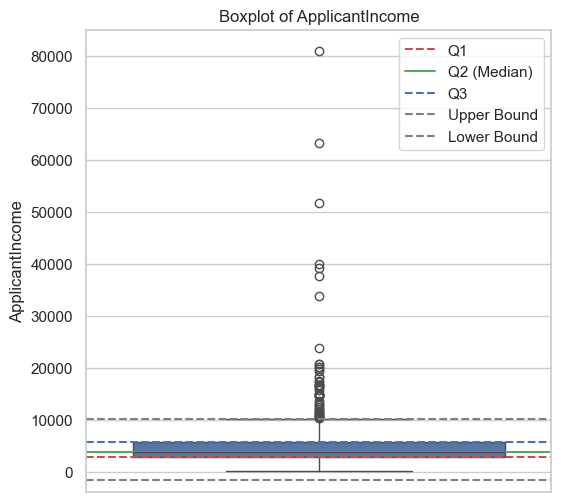

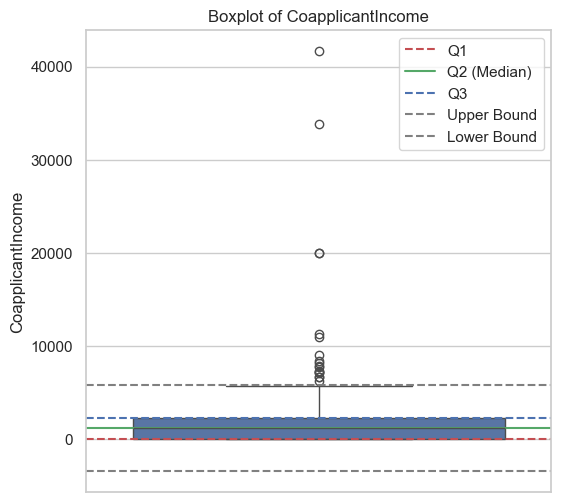

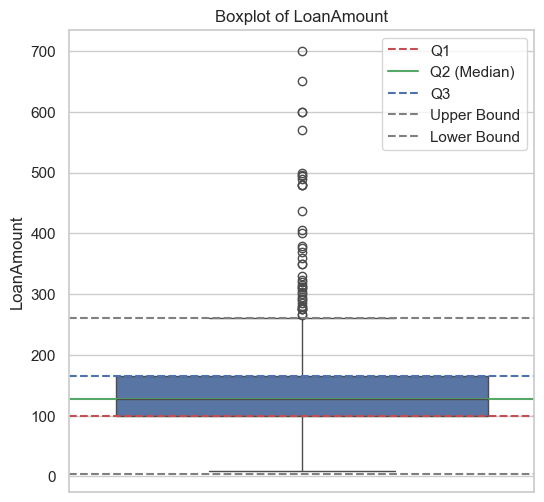

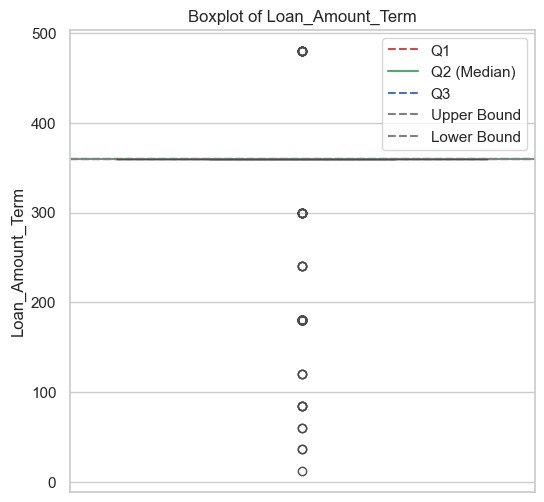

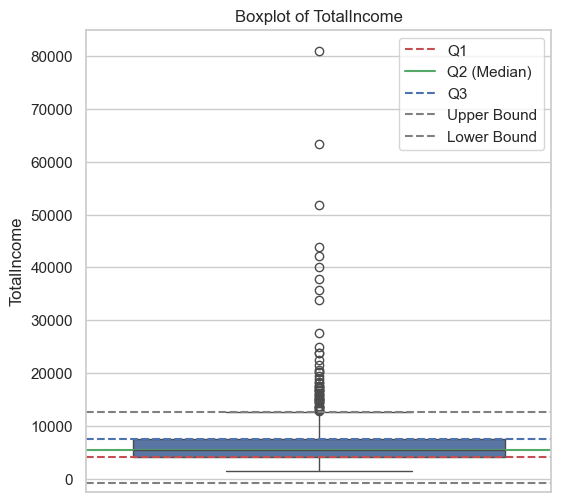

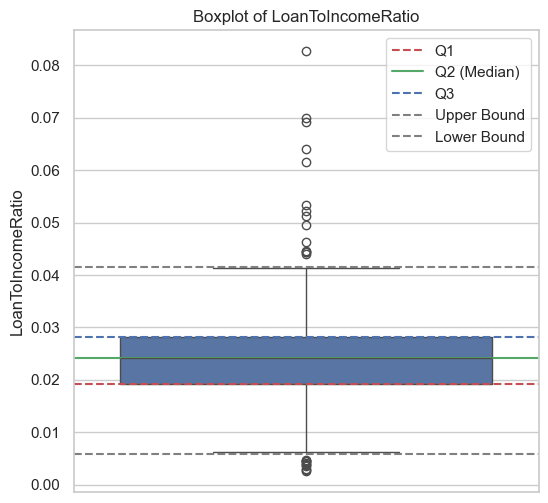

In [146]:
# Identify numerical columns
numericalcolumns = data.select_dtypes(include=['int64', 'float64']).columns

for i in numericalcolumns:
  plt.figure(figsize=(6,6))
  sns.boxplot(data[i])
  plt.title("Boxplot of " + i)
  
  # calculate quartiles and upper/lower bounds
  q1 = data[i].quantile(0.25)
  q2 = data[i].quantile(0.5)
  q3 = data[i].quantile(0.75)
  iqr = q3 - q1
  upper = q3 + 1.5*iqr
  lower = q1 - 1.5*iqr
  
  # mark quartiles and upper/lower bounds on the plot
  plt.axhline(q1, color='r', linestyle='--', label='Q1')
  plt.axhline(q2, color='g', linestyle='-', label='Q2 (Median)')
  plt.axhline(q3, color='b', linestyle='--', label='Q3')
  plt.axhline(upper, color='gray', linestyle='--', label='Upper Bound')
  plt.axhline(lower, color='gray', linestyle='--', label='Lower Bound')
  
  plt.legend()
  plt.show()

In [147]:
#percentage of outliers present in each column
for i in numericalcolumns:
    
 IQR = (data[i]).quantile(0.75) - (data[i]).quantile(0.25)
 Upper_limit = (data[i]).quantile(0.75) + IQR*1.5
 lower_limit = (data[i]).quantile(0.25) - IQR*1.5
 print("|",i,"|",round(100.0 * len(data[(data[i])>Upper_limit])/len(data), 2)+round(100.0 * len(data[(data[i])<lower_limit])/len(data), 2))

| ApplicantIncome | 8.14
| CoapplicantIncome | 2.93
| LoanAmount | 6.68
| Loan_Amount_Term | 14.33
| TotalIncome | 8.14
| LoanToIncomeRatio | 4.07


There are outliers present but we cant replace outliers in all cases there might be a scenario where carry meaningful signals (e.g., high incomes in loan applications,the model is robust to outliers (like tree-based models: Random Forest, XGBoost).

In [148]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanToIncomeRatio', 'LoanAmount_Bin'],
      dtype='object')

<Axes: xlabel='LoanAmount', ylabel='TotalIncome'>

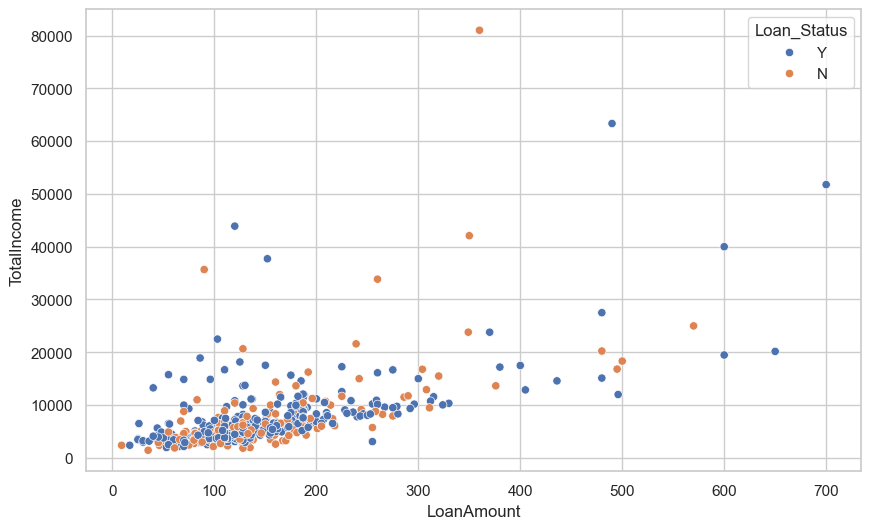

In [149]:
sns.scatterplot(x=data["LoanAmount"],y=data["TotalIncome"],hue=data["Loan_Status"])

This scatter plot shows the relationship between LoanAmount (x-axis) and TotalIncome (y-axis), with points color-coded by Loan_Status (Y = approved, N = not approved).

Key Observations:
1. Main Cluster (Dense Area)
The majority of data points lie within:

LoanAmount: 50 to 250

TotalIncome: 0 to 20,000

This is your normal range — most applicants fall here.

This region likely reflects the typical loan-to-income ratio.

2. Outliers
Some data points are far away from the main cluster:

TotalIncome > 40,000

LoanAmount > 400

These are clear outliers and rare.

They may skew statistics like mean, correlation, or model performance (especially linear models).

3. Loan Approval Pattern
Both blue (Y) and orange (N) points are spread across all ranges.

Even some outliers (high loan or income) have been approved (blue) and rejected (orange).

This suggests LoanAmount and TotalIncome alone don't guarantee approval.

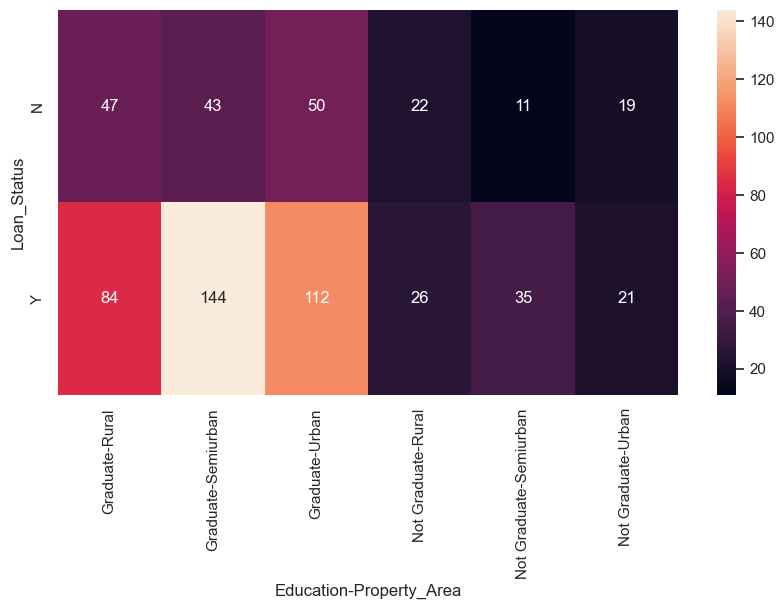

In [150]:
ct = pd.crosstab(
    index=data['Loan_Status'],
    columns=[data['Education'], data['Property_Area']]
)
# create the heatmap with annotations showing the counts
plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d')
plt.show()


In [151]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanToIncomeRatio', 'LoanAmount_Bin'],
      dtype='object')

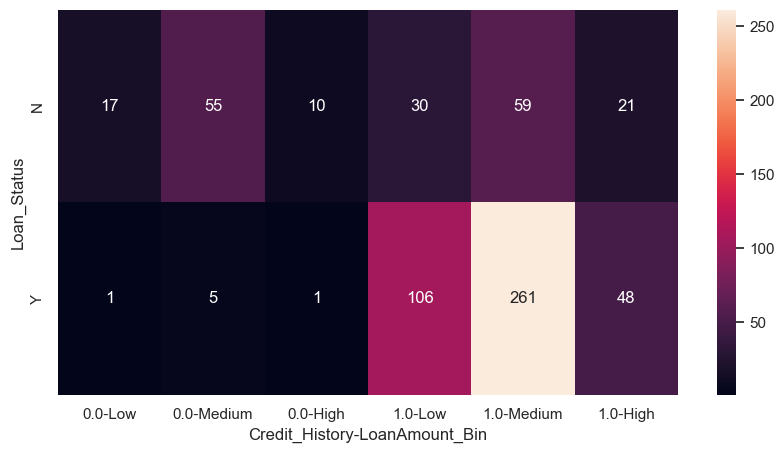

In [152]:
ct = pd.crosstab(
    index=data['Loan_Status'],
    columns=[data['Credit_History'], data['LoanAmount_Bin']]
)
# create the heatmap with annotations showing the counts
plt.figure(figsize=(10, 5))
sns.heatmap(ct, annot=True, fmt='d')
plt.show()


Credit history is the strongest factor — a good credit history (1.0) drastically increases the chance of loan approval, almost regardless of loan size.

Loan amount matters less if credit history is good, but for those with poor credit, even low loan amounts are unlikely to be approved.

Education and location play a secondary role — Graduates in Semiurban and Urban areas have better approval odds.

This indicates that financial credibility (credit history) paired with socio-educational background shapes the outcome of loan applications.

In [153]:
#Stastical_analysis-finding out skewed columns
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,TotalIncome,LoanToIncomeRatio
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,7024.705081,0.023877
std,6109.041673,2926.248369,84.107233,64.428629,6458.663872,0.008707
min,150.000000,0.000000,9.000000,12.000000,1442.000000,0.002523
25%,2877.500000,0.000000,100.250000,360.000000,4166.000000,0.019221
50%,3812.500000,1188.500000,128.000000,360.000000,5416.500000,0.024129
75%,5795.000000,2297.250000,164.750000,360.000000,7521.750000,0.028158
max,81000.000000,41667.000000,700.000000,480.000000,81000.000000,0.082712


In [154]:
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','TotalIncome']].skew()


ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
TotalIncome          5.633449
dtype: float64

| Column            | Skewness | Interpretation                |
| ----------------- | -------- | ----------------------------- |
| ApplicantIncome   | 6.53     | 🚨 **Extremely right-skewed** |
| CoapplicantIncome | 7.49     | 🚨 **Extremely right-skewed** |
| LoanAmount        | 2.74     | ⚠️ **Very right-skewed**      |
| TotalIncome       | 5.63     | 🚨 **Extremely right-skewed** |


In [155]:
data['LoanAmount_log']=np.log1p(data['LoanAmount'])
data["CoapplicantIncome_log"] = np.log1p(data['CoapplicantIncome'])
data["ApplicantIncome_log"] = np.log1p(data['ApplicantIncome'])
data["TotalIncome_log"] = np.log1p(data['TotalIncome'])


In [156]:
# Recalculate engineered features after imputation
data['LoanToIncomeRatio'] = data['LoanAmount_log'] / (data['ApplicantIncome_log'] + data['CoapplicantIncome_log'])
bins = [0, 100, 200, 700]
labels = ['Low', 'Medium', 'High']
data['LoanAmount_Bin'] = pd.cut(data['LoanAmount_log'], bins=bins, labels=labels)

In [157]:
data["Loan_Amount_Term"].describe()

count    614.000000
mean     342.410423
std       64.428629
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [158]:
#Binning the loan_ammount_term_will be better because more than continous variable it is looking like a categorical column
bins = [0, 60, 180, 300, data["Loan_Amount_Term"].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long']
data['Loan_Amount_Term_Bin'] = pd.cut(data['Loan_Amount_Term'], bins=bins, labels=labels, right=True)


In [159]:
data['Loan_Amount_Term_Bin'].astype("object")

0       Long
1       Long
2       Long
3       Long
4       Long
       ...  
609     Long
610    Short
611     Long
612     Long
613     Long
Name: Loan_Amount_Term_Bin, Length: 614, dtype: object

In [160]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Property_Area,Loan_Status,TotalIncome,LoanToIncomeRatio,LoanAmount_Bin,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log,Loan_Amount_Term_Bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,Urban,Y,5849.0,0.560261,Low,4.859812,0.000000,8.674197,8.674197,Long
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,Rural,N,6091.0,0.308569,Low,4.859812,7.319202,8.430327,8.714732,Long
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,Urban,Y,3000.0,0.525147,Low,4.204693,0.000000,8.006701,8.006701,Long
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,Urban,Y,4941.0,0.306968,Low,4.795791,7.765993,7.857094,8.505525,Long
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,Urban,Y,6000.0,0.569656,Low,4.955827,0.000000,8.699681,8.699681,Long


In [161]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanToIncomeRatio', 'LoanAmount_Bin', 'LoanAmount_log',
       'CoapplicantIncome_log', 'ApplicantIncome_log', 'TotalIncome_log',
       'Loan_Amount_Term_Bin'],
      dtype='object')

In [162]:
#feature_engineering:-lets build new features from the exisitng columns

data['EMI'] = data['LoanAmount'] * 1000 / data['Loan_Amount_Term']
data['EMI_log']=np.log1p(data['EMI'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,TotalIncome,LoanToIncomeRatio,LoanAmount_Bin,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log,Loan_Amount_Term_Bin,EMI,EMI_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,...,5849.0,0.560261,Low,4.859812,0.000000,8.674197,8.674197,Long,355.555556,5.876490
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,...,6091.0,0.308569,Low,4.859812,7.319202,8.430327,8.714732,Long,355.555556,5.876490
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,...,3000.0,0.525147,Low,4.204693,0.000000,8.006701,8.006701,Long,183.333333,5.216746
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,...,4941.0,0.306968,Low,4.795791,7.765993,7.857094,8.505525,Long,333.333333,5.812138
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,...,6000.0,0.569656,Low,4.955827,0.000000,8.699681,8.699681,Long,391.666667,5.972961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,...,2900.0,0.536406,Low,4.276666,0.000000,7.972811,7.972811,Long,197.222222,5.289389
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,...,4106.0,0.446319,Low,3.713572,0.000000,8.320448,8.320448,Short,222.222222,5.408168
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,...,8312.0,0.382384,Low,5.537334,5.484797,8.996280,9.025576,Long,702.777778,6.556463
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,...,7583.0,0.586139,Low,5.236442,0.000000,8.933796,8.933796,Long,519.444444,6.254683


In [163]:


def encode_categorical(df, method='label'):
    """
    Encodes all categorical columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): Input DataFrame
        method (str): 'label' for Label Encoding, 'onehot' for One-Hot Encoding

    Returns:
        pd.DataFrame: DataFrame with encoded categorical columns
    """
    df_encoded = df.copy()
    cat_cols = df_encoded.select_dtypes(include=['object', 'category']).columns

    if method == 'label':
        le = LabelEncoder()
        for col in cat_cols:
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    elif method == 'onehot':
        df_encoded = pd.get_dummies(df_encoded, columns=cat_cols, drop_first=True)

    else:
        raise ValueError("Encoding method must be either 'label' or 'onehot'")

    return df_encoded

encoded_df = encode_categorical(data, method='label')  # or 'onehot'


In [164]:
encoded_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,TotalIncome,LoanToIncomeRatio,LoanAmount_Bin,LoanAmount_log,CoapplicantIncome_log,ApplicantIncome_log,TotalIncome_log,Loan_Amount_Term_Bin,EMI,EMI_log
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,...,5849.0,0.560261,0,4.859812,0.000000,8.674197,8.674197,0,355.555556,5.876490
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,...,6091.0,0.308569,0,4.859812,7.319202,8.430327,8.714732,0,355.555556,5.876490
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,...,3000.0,0.525147,0,4.204693,0.000000,8.006701,8.006701,0,183.333333,5.216746
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,...,4941.0,0.306968,0,4.795791,7.765993,7.857094,8.505525,0,333.333333,5.812138
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,...,6000.0,0.569656,0,4.955827,0.000000,8.699681,8.699681,0,391.666667,5.972961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,...,2900.0,0.536406,0,4.276666,0.000000,7.972811,7.972811,0,197.222222,5.289389
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,...,4106.0,0.446319,0,3.713572,0.000000,8.320448,8.320448,2,222.222222,5.408168
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,...,8312.0,0.382384,0,5.537334,5.484797,8.996280,9.025576,0,702.777778,6.556463
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,...,7583.0,0.586139,0,5.236442,0.000000,8.933796,8.933796,0,519.444444,6.254683


In [165]:
data["Property_Area"]

0          Urban
1          Rural
2          Urban
3          Urban
4          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [166]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanToIncomeRatio', 'LoanAmount_Bin', 'LoanAmount_log',
       'CoapplicantIncome_log', 'ApplicantIncome_log', 'TotalIncome_log',
       'Loan_Amount_Term_Bin', 'EMI', 'EMI_log'],
      dtype='object')

In [167]:
#Model_building
# split into input (X) and output (y) variables
X=encoded_df.drop(['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term','Loan_Status','TotalIncome','EMI'], axis=1)
y=encoded_df["Loan_Status"]

In [168]:

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size=0.25,random_state=107,shuffle=True)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (460, 15)
X _test Size: (154, 15)
Y_train Size: (460,)
Y_test Size: (154,)


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y,test_size=0.25,random_state=107,shuffle=True)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (460, 15)
X _test Size: (154, 15)
Y_train Size: (460,)
Y_test Size: (154,)


Defining error metrics

In [170]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [171]:
#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):
    train_accuracy = accuracy_score(train_actual, train_predicted)
    train_recall = recall_score(train_actual, train_predicted, average="macro")
    train_precision = precision_score(train_actual, train_predicted, average="macro")
    train_f1score = f1_score(train_actual, train_predicted, average="macro")
    test_accuracy = accuracy_score(test_actual, test_predicted)
    test_recall = recall_score(test_actual, test_predicted, average="macro")
    test_precision = precision_score(test_actual, test_predicted, average="macro")
    test_f1score = f1_score(test_actual, test_predicted, average="macro")

    # Use pd.concat instead of append
    new_row = pd.DataFrame([[model_description, train_accuracy, train_recall, train_precision, train_f1score,
                             test_accuracy, test_recall, test_precision, test_f1score]],
                           columns=dataframe.columns)
    dataframe = pd.concat([dataframe, new_row], ignore_index=True)
    return dataframe

#Model building

We will experiment different models until we find out a generalized model out of all.

1)naivebayes classifier

2)decision tree classifier

3)random forest classifier

4)support vector machines classifier

5)logistic regression-(one vs all approach)

6)boosting techniques

7)neuralnetworks

8)knn classifier


we will choose the best model from all and then try to draw learning patterns for all this models.

In [172]:
#1)models

###**1)Naive bayes classifier**
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn import svm
NB1 =  GaussianNB()
NB1=NB1.fit(X_train, y_train)
y_pred_train =NB1.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = NB1.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))
print("recall-train",recall_score(y_train,y_pred_train,average='macro'))
print("recall-test",recall_score(y_test,y_pred_test,average='macro'))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GaussianNB",scores)
scores

trainaccuracy 0.8173913043478261
testaccuracy 0.7597402597402597
recall-train 0.7329026019690577
recall-test 0.6544811320754718

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8488    0.5069    0.6348       144
           1     0.8102    0.9589    0.8783       316

    accuracy                         0.8174       460
   macro avg     0.8295    0.7329    0.7565       460
weighted avg     0.8223    0.8174    0.8020       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.7200    0.3750    0.4932        48
           1     0.7674    0.9340    0.8426       106

    accuracy                      

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.75974,0.654481,0.743721,0.667852


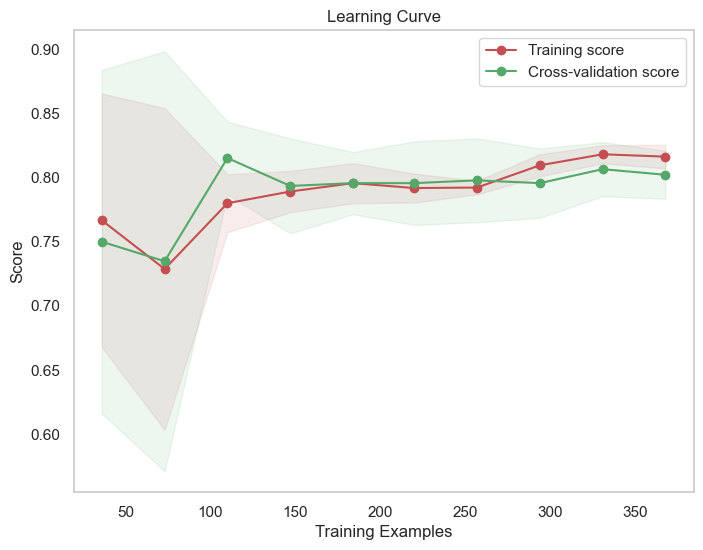

In [173]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
# Define the stratified k-fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes, train_scores, test_scores = learning_curve(NB1, X_train, y_train, cv=skf, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**As per observation from learning curve,Naive bayes classifier models seems to underfit.The reason for our model underfitting could be lesser training data,but if we observe classification report we could see that recall for target label is also low.So,we will further decide on checking other models.Here we are not getting desired perfomance.**

2)Decision_tree_classifer

In [174]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X=X_train, y= y_train)

y_pred_train = clf_dt.predict(X_train)
y_pred_test = clf_dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decisiontree",scores)
scores

Train Accuracy: 1.0
Test Accuracy: 0.7337662337662337

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       144
           1     1.0000    1.0000    1.0000       316

    accuracy                         1.0000       460
   macro avg     1.0000    1.0000    1.0000       460
weighted avg     1.0000    1.0000    1.0000       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.5854    0.5000    0.5393        48
           1     0.7876    0.8396    0.8128       106

    accuracy                         0.7338       154
   macro avg     0.6865    0.6698    0.6761       154


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.759740,0.654481,0.743721,0.667852
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.733766,0.669811,0.686488,0.676056


**As per observation from our learning curve we could see that model is overfitting.Best models should always generalize well when faced with instances that were not part of the initial training data.There is a large gap between training and validation data.To adress this issue we can either add more data or do hyperparamter tuning for better results.**

3)Random_forest_classifier

In [175]:
# Import Randomforest Library

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"randomforest",scores)
scores

Train Accuracy: 1.0
Test Accuracy: 0.7402597402597403

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       144
           1     1.0000    1.0000    1.0000       316

    accuracy                         1.0000       460
   macro avg     1.0000    1.0000    1.0000       460
weighted avg     1.0000    1.0000    1.0000       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.6429    0.3750    0.4737        48
           1     0.7619    0.9057    0.8276       106

    accuracy                         0.7403       154
   macro avg     0.7024    0.6403    0.6506       154


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.759740,0.654481,0.743721,0.667852
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.733766,0.669811,0.686488,0.676056
2,randomforest,1.000000,1.000000,1.000000,1.000000,0.740260,0.640330,0.702381,0.650635


**It is also example of overfiiting as there is a huge gap between training and validation sets.**

###4)**SVMCLASSIFIER**

In [176]:
from sklearn.svm import SVC 
clf_svc = SVC()
clf_svc.fit(X=X_train, y= y_train)

y_pred_train = clf_svc.predict(X_train)
y_pred_test = clf_svc.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"SVMCLASSIFIER",scores)
scores

Train Accuracy: 0.6869565217391305
Test Accuracy: 0.6883116883116883

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       144
           1     0.6870    1.0000    0.8144       316

    accuracy                         0.6870       460
   macro avg     0.3435    0.5000    0.4072       460
weighted avg     0.4719    0.6870    0.5595       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        48
           1     0.6883    1.0000    0.8154       106

    accuracy                         0.6883       154
   macro avg     0.3442    0.5000    0.

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.759740,0.654481,0.743721,0.667852
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.733766,0.669811,0.686488,0.676056
2,randomforest,1.000000,1.000000,1.000000,1.000000,0.740260,0.640330,0.702381,0.650635
3,SVMCLASSIFIER,0.686957,0.500000,0.343478,0.407216,0.688312,0.500000,0.344156,0.407692


**This comes under a generalized model,we will further analyze by learning curves while doing hyper parameter tuning,but the problem with svm is it takes so much time,we will check for alternative models if we didnt find any then we will use svm classifier**

In [177]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
clf_lr = LogisticRegression(random_state=42, solver='liblinear') # You can adjust hyperparameters

# Fit the model to the training data
clf_lr.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_pred_train_lr = clf_lr.predict(X_train)
y_pred_test_lr = clf_lr.predict(X_test)

# Evaluate the performance of Logistic Regression
print("\nLogistic Regression:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train_lr))
# print("Train Classification Report:")
# print(classification_report(y_train, y_pred_train_lr, digits=4))

print("Test Accuracy:", accuracy_score(y_test, y_pred_test_lr))
# print("Test Classification Report:")
# print(classification_report(y_test, y_pred_test_lr, digits=4))

# Assuming your 'classifcation_report_train_test' function exists and works with these predictions
classifcation_report_train_test(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

# Assuming your 'get_metrics' function exists and takes the model name
scores = get_metrics(y_train, y_pred_train_lr, y_test, y_pred_test_lr, "LogisticRegression", scores)




Logistic Regression:
Train Accuracy: 0.8195652173913044
Test Accuracy: 0.7922077922077922

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9178    0.4653    0.6175       144
           1     0.8010    0.9810    0.8819       316

    accuracy                         0.8196       460
   macro avg     0.8594    0.7231    0.7497       460
weighted avg     0.8376    0.8196    0.7992       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9444    0.3542    0.5152        48
           1     0.7721    0.9906    0.8678       106

    accuracy                         0.7922       154
   macro avg     

In [178]:
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.759740,0.654481,0.743721,0.667852
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.733766,0.669811,0.686488,0.676056
2,randomforest,1.000000,1.000000,1.000000,1.000000,0.740260,0.640330,0.702381,0.650635
3,SVMCLASSIFIER,0.686957,0.500000,0.343478,0.407216,0.688312,0.500000,0.344156,0.407692
4,LogisticRegression,0.819565,0.723145,0.859421,0.749723,0.792208,0.672366,0.858252,0.691460


In [179]:
clf_GBM = GradientBoostingClassifier()
clf_GBM.fit(X=X_train, y=y_train)

y_pred_train = clf_GBM.predict(X_train)
y_pred_test = clf_GBM.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)

Train Accuracy: 0.9347826086956522
Test Accuracy: 0.7402597402597403

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9914    0.7986    0.8846       144
           1     0.9157    0.9968    0.9545       316

    accuracy                         0.9348       460
   macro avg     0.9535    0.8977    0.9196       460
weighted avg     0.9394    0.9348    0.9327       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.6333    0.3958    0.4872        48
           1     0.7661    0.8962    0.8261       106

    accuracy                         0.7403       154
   macro avg     0.6997    0.6460    0.

In [180]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
# Get the predicted class probabilities for the train and test data
y_pred_train_prob = model.predict(X_train)
y_pred_test_prob = model.predict(X_test)

# Get the predicted classes by selecting the class with the highest probability
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)
# Print the accuracy scores for the training and test data
print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
print("Test Accuracy:",accuracy_score(y_test,y_pred_test))

# Print the classification report for the training and test data
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
# Get the metrics for the classifier and add them to the scores dictionary
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"ANN-CLASSIFICATION",scores)

Epoch 1/10
15/15 [==============================] - 1s 16ms/step - loss: 2.0203 - accuracy: 0.3413 - val_loss: 0.8040 - val_accuracy: 0.5130
Epoch 2/10
15/15 [==============================] - 0s 6ms/step - loss: 0.8389 - accuracy: 0.5674 - val_loss: 0.6978 - val_accuracy: 0.6883
Epoch 3/10
15/15 [==============================] - 0s 6ms/step - loss: 0.7124 - accuracy: 0.6500 - val_loss: 0.6274 - val_accuracy: 0.6883
Epoch 4/10
15/15 [==============================] - 0s 6ms/step - loss: 0.7168 - accuracy: 0.6000 - val_loss: 0.6182 - val_accuracy: 0.6883
Epoch 5/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6832 - accuracy: 0.6457 - val_loss: 0.6196 - val_accuracy: 0.6883
Epoch 6/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6815 - accuracy: 0.6370 - val_loss: 0.6090 - val_accuracy: 0.6883
Epoch 7/10
15/15 [==============================] - 0s 6ms/step - loss: 0.6217 - accuracy: 0.6783 - val_loss: 0.6161 - val_accuracy: 0.6883
Epoch 8/10
15/15 [=

##3)Validation and paramter Tuning

In [181]:
# Define the stratified k-fold cross-validator
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV

In [182]:
#Lets start randomized search cv with our overfit models first

In [183]:
###1)**Decision tree with hyperparamters**

In [184]:
# Decision Tree with RandomizedSearchCV - Hyper-parameter Tuning
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 6],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20]
              }
dt = DecisionTreeClassifier(random_state=123)
clf_dt_grid = RandomizedSearchCV(dt, param_grid,cv=skf,scoring='recall')
clf_dt_grid.fit(X_train, y_train)  
print(clf_dt_grid.best_params_) 

{'min_samples_leaf': 2, 'max_leaf_nodes': 20, 'max_depth': 3, 'criterion': 'entropy', 'class_weight': None}


In [185]:
clf_dt_grid = DecisionTreeClassifier(min_samples_leaf=2, max_leaf_nodes=None, max_depth=5, criterion='gini', class_weight=None)
clf_dt_grid.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid.predict(X_train)
y_pred_test = clf_dt_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)


Train Accuracy: 0.8586956521739131
Test Accuracy: 0.7467532467532467

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8762    0.6389    0.7390       144
           1     0.8535    0.9589    0.9031       316

    accuracy                         0.8587       460
   macro avg     0.8649    0.7989    0.8210       460
weighted avg     0.8606    0.8587    0.8517       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.6552    0.3958    0.4935        48
           1     0.7680    0.9057    0.8312       106

    accuracy                         0.7468       154
   macro avg     0.7116    0.6507    0.

In [186]:
###2)**Decisiontree with randomized search cv using different paramters.**



#from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

clf3_dt = DecisionTreeClassifier(random_state=123, class_weight='balanced') 
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)
max_leaf_nodes[max_leaf_nodes <1] = 1
print(max_leaf_nodes)
max_depth = np.random.uniform(2,5,4).astype(int)
print(max_depth)
min_samples_split = np.random.uniform(2, 6, 5).astype(int)
print(min_samples_split)
## Set Up Hyperparameter Distributions
# normally distributed max_leaf_nodes, with mean 5 stddev 1
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)

# uniform distribution from 2 to 5 
max_depth = np.random.uniform(2,5,4).astype(int)

# uniform distribution from 2 to 6
min_samples_split = np.random.uniform(2, 6, 5).astype(int)

model_params = {
    'max_depth': list(max_depth),
    'max_leaf_nodes': list(max_leaf_nodes),
    'min_samples_split': list(min_samples_split)
}
clf_random = RandomizedSearchCV(estimator=clf3_dt, param_distributions=model_params, n_iter=600, cv=skf, scoring='recall', n_jobs=-1)
clf_random.fit(X_train, y_train)
print(clf_random.best_score_, clf_random.best_params_)
clf_dt_random = clf_random.best_estimator_
print(clf_dt_random)







[4 4 4 5 3]
[4 2 4 3]
[3 3 5 3 4]
0.8892857142857142 {'min_samples_split': 2, 'max_leaf_nodes': 5, 'max_depth': 4}
DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_leaf_nodes=5,
                       random_state=123)


In [187]:
clf_dt_grid2 = DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=4,
                       min_samples_split=4, random_state=123)
clf_dt_grid2.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid2.predict(X_train)
y_pred_test = clf_dt_grid2.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.7913043478260869
Test Accuracy: 0.6688311688311688

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.6875    0.6111    0.6471       144
           1     0.8313    0.8734    0.8519       316

    accuracy                         0.7913       460
   macro avg     0.7594    0.7423    0.7495       460
weighted avg     0.7863    0.7913    0.7877       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.4615    0.3750    0.4138        48
           1     0.7391    0.8019    0.7692       106

    accuracy                         0.6688       154
   macro avg     0.6003    0.5884    0.

In [188]:
param_grid = {#"n_estimators" : [50,60],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5],
              "max_depth": [None, 7],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.001,0.01,0.1]
             }
rfclf2 = RandomForestClassifier()
rfclf_grid = RandomizedSearchCV(rfclf2, param_grid, cv=skf)     
rfclf_grid.fit(X_train, y_train)
print(rfclf_grid.best_params_)
rfclf_grid = rfclf_grid.best_estimator_ 
print(rfclf_grid)

{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.01}
RandomForestClassifier(ccp_alpha=0.01, max_depth=7, min_samples_split=5)


In [189]:
rfclf_grid =RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', min_samples_leaf=5)
rfclf_grid.fit(X=X_train, y= y_train)

y_pred_train = rfclf_grid.predict(X_train)
y_pred_test = rfclf_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.8630434782608696
Test Accuracy: 0.7662337662337663

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9263    0.6111    0.7364       144
           1     0.8466    0.9778    0.9075       316

    accuracy                         0.8630       460
   macro avg     0.8864    0.7945    0.8219       460
weighted avg     0.8715    0.8630    0.8539       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.7727    0.3542    0.4857        48
           1     0.7652    0.9528    0.8487       106

    accuracy                         0.7662       154
   macro avg     0.7689    0.6535    0.

In [190]:
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.759740,0.654481,0.743721,0.667852
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.733766,0.669811,0.686488,0.676056
2,randomforest,1.000000,1.000000,1.000000,1.000000,0.740260,0.640330,0.702381,0.650635
3,SVMCLASSIFIER,0.686957,0.500000,0.343478,0.407216,0.688312,0.500000,0.344156,0.407692
4,LogisticRegression,0.819565,0.723145,0.859421,0.749723,0.792208,0.672366,0.858252,0.691460
5,GBM,0.934783,0.897723,0.953538,0.919580,0.740260,0.646030,0.699731,0.656633
6,ANN-CLASSIFICATION,0.686957,0.500000,0.343478,0.407216,0.688312,0.500000,0.344156,0.407692


In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'] # 'saga' supports both l1 and l2
}

# Initialize the Logistic Regression model
clf_lr = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# cv=5 means 5-fold cross-validation
# scoring='accuracy' specifies the metric to optimize
# n_jobs=-1 uses all available CPU cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_lr = grid_search.best_params_
best_model_lr = grid_search.best_estimator_

# Make predictions using the best model
y_pred_train_best_lr = best_model_lr.predict(X_train)
y_pred_test_best_lr = best_model_lr.predict(X_test)

# Evaluate the best model
print("\nLogistic Regression with Best Hyperparameters:")
print("Best Hyperparameters:", best_params_lr)
print("Train Accuracy (Best Model):", accuracy_score(y_train, y_pred_train_best_lr))
# print("Train Classification Report (Best Model):")
# print(classification_report(y_train, y_pred_train_best_lr, digits=4))

print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_test_best_lr))
# print("Test Classification Report (Best Model):")
# print(classification_report(y_test, y_pred_test_best_lr, digits=4))

# Update scores with the best Logistic Regression model
scores = get_metrics(y_train, y_pred_train_best_lr, y_test, y_pred_test_lr, "LogisticRegression_Tuned", scores)

print("\nUpdated Scores with Tuned Logistic Regression:", scores)


Logistic Regression with Best Hyperparameters:
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy (Best Model): 0.8195652173913044
Test Accuracy (Best Model): 0.7922077922077922

Updated Scores with Tuned Logistic Regression:                       Model  Train_Accuracy  Train_Recall  Train_Precision  \
0                GaussianNB        0.817391      0.732903         0.829499   
1              Decisiontree        1.000000      1.000000         1.000000   
2              randomforest        1.000000      1.000000         1.000000   
3             SVMCLASSIFIER        0.686957      0.500000         0.343478   
4        LogisticRegression        0.819565      0.723145         0.859421   
5                       GBM        0.934783      0.897723         0.953538   
6        ANN-CLASSIFICATION        0.686957      0.500000         0.343478   
7  LogisticRegression_Tuned        0.819565      0.723145         0.859421   

   Train_F1_Score  Test_Accuracy  T

In [192]:
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,GaussianNB,0.817391,0.732903,0.829499,0.756522,0.759740,0.654481,0.743721,0.667852
1,Decisiontree,1.000000,1.000000,1.000000,1.000000,0.733766,0.669811,0.686488,0.676056
2,randomforest,1.000000,1.000000,1.000000,1.000000,0.740260,0.640330,0.702381,0.650635
3,SVMCLASSIFIER,0.686957,0.500000,0.343478,0.407216,0.688312,0.500000,0.344156,0.407692
4,LogisticRegression,0.819565,0.723145,0.859421,0.749723,0.792208,0.672366,0.858252,0.691460
5,GBM,0.934783,0.897723,0.953538,0.919580,0.740260,0.646030,0.699731,0.656633
6,ANN-CLASSIFICATION,0.686957,0.500000,0.343478,0.407216,0.688312,0.500000,0.344156,0.407692
7,LogisticRegression_Tuned,0.819565,0.723145,0.859421,0.749723,0.792208,0.672366,0.858252,0.691460


In [193]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'TotalIncome', 'LoanToIncomeRatio', 'LoanAmount_Bin', 'LoanAmount_log',
       'CoapplicantIncome_log', 'ApplicantIncome_log', 'TotalIncome_log',
       'Loan_Amount_Term_Bin', 'EMI', 'EMI_log'],
      dtype='object')

#feature_selection_for_best_model


In [194]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Select top k features based on mutual information
k = 5# Select top 5 features, adjust as needed.
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

print("\nSelected features:")
print(selected_features)


Selected features:
Index(['Married', 'Education', 'Credit_History', 'LoanAmount_Bin',
       'Loan_Amount_Term_Bin'],
      dtype='object')


In [195]:
# split into input (X) and output (y) variables
X = encoded_df[['Gender', 'Married', 'Dependents', 'Credit_History', 'EMI_log']]
y = encoded_df["Loan_Status"]

In [196]:
#defining error metrics
scores_with_features = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])


def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):
    train_accuracy = accuracy_score(train_actual, train_predicted)
    train_recall = recall_score(train_actual, train_predicted, average="macro")
    train_precision = precision_score(train_actual, train_predicted, average="macro")
    train_f1score = f1_score(train_actual, train_predicted, average="macro")
    test_accuracy = accuracy_score(test_actual, test_predicted)
    test_recall = recall_score(test_actual, test_predicted, average="macro")
    test_precision = precision_score(test_actual, test_predicted, average="macro")
    test_f1score = f1_score(test_actual, test_predicted, average="macro")

    # Use pd.concat instead of append
    new_row = pd.DataFrame([[model_description, train_accuracy, train_recall, train_precision, train_f1score,
                             test_accuracy, test_recall, test_precision, test_f1score]],
                           columns=dataframe.columns)
    dataframe = pd.concat([dataframe, new_row], ignore_index=True)
    return dataframe

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the hyperparameter grid to search
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'] # 'saga' supports both l1 and l2
}

# Initialize the Logistic Regression model
clf_lr = LogisticRegression(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# cv=5 means 5-fold cross-validation
# scoring='accuracy' specifies the metric to optimize
# n_jobs=-1 uses all available CPU cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_lr = grid_search.best_params_
best_model_lr = grid_search.best_estimator_

# Make predictions using the best model
y_pred_train_best_lr = best_model_lr.predict(X_train)
y_pred_test_best_lr = best_model_lr.predict(X_test)

# Evaluate the best model
print("\nLogistic Regression with Best Hyperparameters:")
print("Best Hyperparameters:", best_params_lr)
print("Train Accuracy (Best Model):", accuracy_score(y_train, y_pred_train_best_lr))
# print("Train Classification Report (Best Model):")
# print(classification_report(y_train, y_pred_train_best_lr, digits=4))

print("Test Accuracy (Best Model):", accuracy_score(y_test, y_pred_test_best_lr))
# print("Test Classification Report (Best Model):")
# print(classification_report(y_test, y_pred_test_best_lr, digits=4))

# Update scores with the best Logistic Regression model
scores = get_metrics(y_train, y_pred_train_best_lr, y_test, y_pred_test_lr, "LogisticRegression_Tuned", scores_with_features)

print("\nUpdated Scores with Tuned Logistic Regression:", scores)


Logistic Regression with Best Hyperparameters:
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy (Best Model): 0.8195652173913044
Test Accuracy (Best Model): 0.7922077922077922

Updated Scores with Tuned Logistic Regression:                       Model  Train_Accuracy  Train_Recall  Train_Precision  \
0  LogisticRegression_Tuned        0.819565      0.723145         0.859421   

   Train_F1_Score  Test_Accuracy  Test_Recall  Test_Precision  Test_F1_Score  
0        0.749723       0.792208     0.672366        0.858252        0.69146  


In [198]:
rfclf_grid =RandomForestClassifier(ccp_alpha=0.001, criterion='entropy', min_samples_leaf=5)
rfclf_grid.fit(X=X_train, y= y_train)

y_pred_train = rfclf_grid.predict(X_train)
y_pred_test = rfclf_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.8586956521739131
Test Accuracy: 0.7857142857142857

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9247    0.5972    0.7257       144
           1     0.8420    0.9778    0.9048       316

    accuracy                         0.8587       460
   macro avg     0.8833    0.7875    0.8153       460
weighted avg     0.8679    0.8587    0.8488       460


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8571    0.3750    0.5217        48
           1     0.7744    0.9717    0.8619       106

    accuracy                         0.7857       154
   macro avg     0.8158    0.6733    0.

#Search would take long lets keep it simple and use the best model.pt and pickle it and use it for streamlit prpose

Logistic Regression with Best Hyperparameters:
Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
best_model_lr

In [199]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Credit_History', 'EMI_log'], dtype='object')

In [200]:
import pickle
# Specify the path where you want to save the pickle file
file_path = 'tuned_model/best_model_lr_with_best_features.pkl'  # You can choose any name with the .pkl extension

# Open the file in binary write mode ('wb')
with open(file_path, 'wb') as file:
    pickle.dump(best_model_lr, file)

print(f"Model saved successfully to {file_path}")

Model saved successfully to tuned_model/best_model_lr_with_best_features.pkl


In [201]:
print(X_train.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'LoanToIncomeRatio',
       'LoanAmount_Bin', 'LoanAmount_log', 'CoapplicantIncome_log',
       'ApplicantIncome_log', 'TotalIncome_log', 'Loan_Amount_Term_Bin',
       'EMI_log'],
      dtype='object')
